#### A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties. Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

### Acknowledgements for Dataset.
- Navoneel Chakrabarty
- Swati Kanchan

#### https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri

### Project Overview 
- You are assigned to assist doctors in classifying 3 different types of brain tumors using a Computer Vision(CNN)
- Create a model that will provide a satifying prediciton for each tumor image 
- Remember that this is a critical diagnostic so your model should have good probabilitiy assignments in predictions for the doctors to consider it a valid model

### Importing Libraries

In [3]:
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

### Loading Data 
- load data from local path to prevent lage files issues with Git
- The model will most likely be trained on an AWS EC2 instance to speed up training 
- This is due to CNN taking a much longer time to train

In [5]:
data_dir = "/Users/berkatbhatti/Desktop/DataFiles/Images/brainTumor/"

In [6]:
os.listdir(data_dir)

['Training', 'Testing']

### Training Dir
- Path to the training images

In [7]:
train_dir = data_dir+"Training"

In [8]:
os.listdir(train_dir)

['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']

### Testing Dir 
- Path to testing images 

In [9]:
test_dir = data_dir+"Testing"

In [10]:
os.listdir(test_dir)

['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']

#### Taking a look at each type of Tumor

## meningioma_tumor

In [11]:
os.listdir(train_dir+"/pituitary_tumor")

['p (477).jpg',
 'p (162).jpg',
 'p (498).jpg',
 'p (532).jpg',
 'p (75).jpg',
 'p (420).jpg',
 'p (565).jpg',
 'p (135).jpg',
 'p (22).jpg',
 'p (359).jpg',
 'p (709).jpg',
 'p (436).jpg',
 'p (820).jpg',
 'p (123).jpg',
 'p (573).jpg',
 'p (8).jpg',
 'p (34).jpg',
 'p (461).jpg',
 'p (524).jpg',
 'p (174).jpg',
 'p (63).jpg',
 'p (318).jpg',
 'p (748).jpg',
 'p (363).jpg',
 'p (699).jpg',
 'p (733).jpg',
 'p (226).jpg',
 'p (676).jpg',
 'p (18).jpg',
 'p (158).jpg',
 'p (508).jpg',
 'p (764).jpg',
 'p (334).jpg',
 'p (621).jpg',
 'p (271).jpg',
 'p (322).jpg',
 'p (772).jpg',
 'p (288).jpg',
 'p (267).jpg',
 'p (637).jpg',
 'p (59).jpg',
 'p (119).jpg',
 'p (549).jpg',
 'p (725).jpg',
 'p (375).jpg',
 'p (660).jpg',
 'p (230).jpg',
 'p (247).jpg',
 'p (617).jpg',
 'p (79).jpg',
 'p (96).jpg',
 'p (302).jpg',
 'p (752).jpg',
 'p (181).jpg',
 'p (494).jpg',
 'p (640).jpg',
 'p (210).jpg',
 'p (705).jpg',
 'p (355).jpg',
 'p (586).jpg',
 'p (139).jpg',
 'p (569).jpg',
 'p (206).jpg',
 '

In [12]:
meningioma_tumor_path = train_dir+"/meningioma_tumor/"+"m3 (126).jpg"

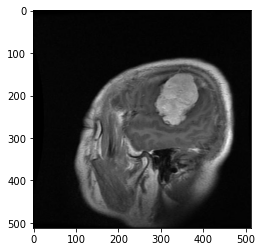

In [13]:
plt.imshow(imread(meningioma_tumor_path))

In [14]:
glioma_tumor_path = train_dir+"/glioma_tumor/"+"gg (698).jpg"

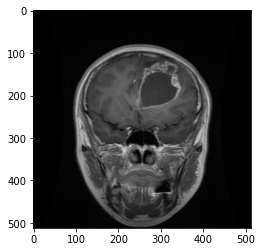

In [15]:
plt.imshow(imread(glioma_tumor_path))

In [16]:
pituitary_tumor_path = train_dir+"/pituitary_tumor/"+"p (359).jpg"

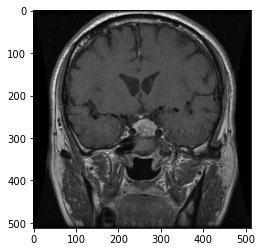

In [17]:
plt.imshow(imread(pituitary_tumor_path))

### Dimension of the images 

In [18]:
imread(pituitary_tumor_path).shape

(512, 512, 3)

In [19]:
imread(glioma_tumor_path).shape

(512, 512, 3)

In [20]:
imread(meningioma_tumor_path).shape

(512, 512, 3)

### Average Image Size 
- Appears that all of the images are 500 X 500 but lets do a check 
- The model will need a set image size to train on 

In [21]:
dim1 = []
dim2 = []
for image_name in os.listdir(train_dir+"/glioma_tumor"):
    img = imread(train_dir+"/glioma_tumor/"+image_name)
    d1, d2,c = img.shape
    dim1.append(d1)
    dim2.append(d2)

### Getting the average size for the images 
- used a random tumor classification to get a sense of the sizes 

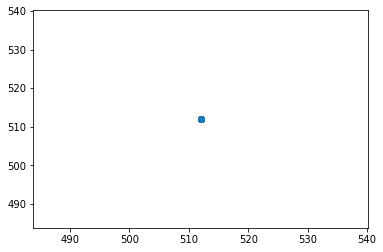

In [22]:
plt.scatter(dim1,dim2)

## Average image size 
- looking at sizes 510,510
- Will decrease to decrease training time
- The images were 3 dimentional so need to add the RGB layer also 
- To decrease training time we will decrease the dimansion of the image 80X80

In [23]:
avg_img_size = (80,80,3)

### Creating an image generartor
- A generator is used in this sense to minipulate the images as they are processed 
- This allows the model learn much better by transforming the images as training progresses

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
generator = ImageDataGenerator(
 featurewise_center=False,
    rotation_range=0.2,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255
)

### Applying the generator to a sample image 

In [26]:
transformed_image = generator.random_transform(imread(meningioma_tumor_path))

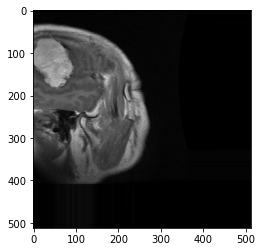

In [27]:
plt.imshow(transformed_image)

### Checking Classes assigned by directories
- The generator should assign the classes of each tumor form the directory
- appears the generator recognized the lasses for each tumor including no tumor

In [28]:
generator.flow_from_directory(train_dir)

Found 2870 images belonging to 4 classes.


In [29]:
generator.flow_from_directory(test_dir)

Found 394 images belonging to 4 classes.


### Training and testing Generator
- Will need to create a training and testing generator for the data 

In [30]:
train_generator = generator.flow_from_directory(
    train_dir,
    target_size=avg_img_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=321,
    shuffle=True,
)

Found 2870 images belonging to 4 classes.


## Shuffle
- The testing data should not be shuffled. This will shuffle the labels also 
- Ths should only be done with the training data for better accuracy

In [31]:
test_generator = generator.flow_from_directory(
    train_dir,
    target_size=avg_img_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=321,
    shuffle=False,
)

Found 2870 images belonging to 4 classes.


### Creating the model
- Will create the model that will fit to the generator
- This model will be trained on an EC2 instance for memory capicity

### Importing Model 
- Model was trained in an AWS EC2 instance for faster training 
- Model was trained with 150 epochs and resulted in a 77% accuracy

In [32]:
from tensorflow.keras.models import load_model

In [33]:
model = load_model("model/brainTumorv1_77+.h5")

In [34]:
#model = Sequential()
#model.add(Conv2D(filters = 40, kernel_size = (2,2), strides = (1,1), padding = "same", activation = "relu",
             #    input_shape = avg_img_size))
#model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Conv2D(filters = 40, kernel_size = (2,2), strides = (1,1), padding = "same", activation = "relu",
          #       input_shape = avg_img_size))
#model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Flatten())
#model.add(Dense(units = 200, activation = "relu"))
#model.add(Dense(units = 60, activation = "relu"))
#model.add(Dense(units = 4, activation = "softmax"))
#model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 40)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 40)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 40)        6440      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 40)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               3200200   
_________________________________________________________________
dense_1 (Dense)              (None, 60)                1

In [35]:
import pandas as pd

In [37]:
history = pd.read_csv("model/model_history77.csv")

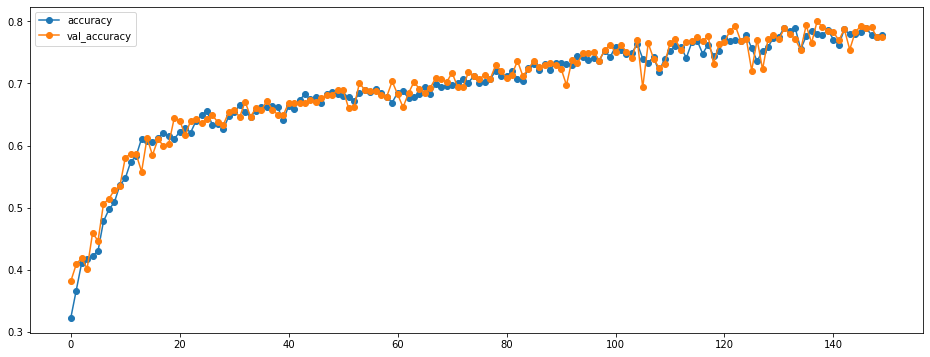

In [38]:
history[["accuracy", "val_accuracy"]].plot(figsize = (16,6), marker = "o")

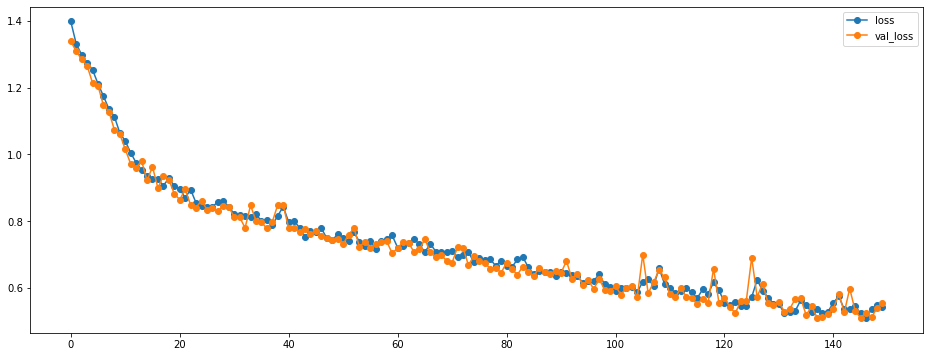

In [39]:
history[["loss", "val_loss"]].plot(figsize = (16,6), marker = "o")

### Making Predicitons

In [41]:
predictions = model.predict(test_generator)

In [42]:
predictions

array([[8.2669038e-01, 1.0725608e-01, 1.1089020e-02, 5.4964513e-02],
       [1.9773138e-01, 5.0531006e-01, 5.2810904e-02, 2.4414764e-01],
       [3.2559049e-01, 6.6599268e-01, 2.2546845e-03, 6.1622155e-03],
       ...,
       [2.5692482e-03, 3.3983946e-02, 1.7985196e-03, 9.6164829e-01],
       [1.6752128e-02, 7.3684201e-02, 1.4016308e-03, 9.0816200e-01],
       [6.3228735e-04, 3.9798301e-02, 4.9681487e-03, 9.5460123e-01]],
      dtype=float32)

In [47]:
#pd.DataFrame(predictions).to_csv("predicitons_v1.csv")

In [43]:
pred = np.argmax(predictions, axis=1)

In [44]:
pred

array([0, 1, 1, ..., 3, 3, 3])

In [45]:
#pd.DataFrame(pred).to_csv("prediction_classes.csv")

### Predictions vs Training classes
- appears the model is having a harder time with 0 and 1 classifications

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [49]:
print(classification_report(pred, test_generator.classes))

              precision    recall  f1-score   support

           0       0.58      0.95      0.72       498
           1       0.79      0.63      0.70      1019
           2       0.86      0.82      0.84       410
           3       0.93      0.81      0.87       943

    accuracy                           0.78      2870
   macro avg       0.79      0.81      0.78      2870
weighted avg       0.81      0.78      0.78      2870



In [50]:
print(confusion_matrix(pred, test_generator.classes))

[[475  11   5   7]
 [298 646  30  45]
 [  4  61 338   7]
 [ 49 104  22 768]]


### Variance
- Approximately 60% of the variance can be explained by the model

In [51]:
print(explained_variance_score(pred, test_generator.classes))

0.5920180185974893


## Testing The Model
- Since we do not new images to test, the approach will be to take random images from the validation folder that we created
- This folder consists of a mixture of all the classes assigned to each image
- This will provide a better understanding of how the model will perform with a new image when it is available 
- THe down side to this is that the model would have seen this image before but there is a possibility that the model would have seen an image like the new one also when passed in.

### Validation Directory

In [54]:
val_dir = "/Users/berkatbhatti/Desktop/DataFiles/Images/brainTumor/Validation/Images/"

In [56]:
len(os.listdir(val_dir))

91

### Randomly  selecting an image 
- Lets go though each image in the validation set and grab one randomly 
- Will select a random class of tumor from our class_indicies

In [495]:
from random import randint

In [560]:
classes = list(train_generator.class_indices.keys())

In [576]:
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [598]:
random_class_name = classes[randint(0, len(classes) -1)]

In [599]:
random_class_name

'meningioma_tumor'

In [649]:
random_index = randint(0, len(os.listdir(train_dir+"/pituitary_tumor")))
random_image_name = os.listdir(train_dir +"/pituitary_tumor")[random_index]

### Random image path

In [650]:
rand_img_pth = train_dir+"/pituitary_tumor"+"/"+random_image_name

In [651]:
val_image = image.load_img(rand_img_pth, target_size= avg_img_size)

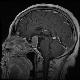

In [652]:
val_image

In [653]:
val_image_array = image.img_to_array(val_image)

In [654]:
val_image_array = val_image_array/255

In [655]:
val_image_array.shape

(80, 80, 3)

### Dimansions 
- Update the dimansion of the image 
- need to have the count dimansion for the model to follow
- 1,80,80,3

In [656]:
val_image_to_use=np.expand_dims(val_image_array, axis=0)

In [657]:
val_image_to_use.shape

(1, 80, 80, 3)

### Checking predicitons on the image

In [658]:
np.argmax(model.predict(val_image_to_use), axis=1)

array([3])

### True Value

In [659]:
test_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [660]:
rand_img_pth

'/Users/berkatbhatti/Desktop/DataFiles/Images/brainTumor/Training/pituitary_tumor/p (457).jpg'